In [3]:
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Import organized Auspice data
df_hi = pd.read_csv('../dataframes/auspice_df_hi.csv', index_col=0)
egg_hi = pd.read_csv('../dataframes/egg_df_hi.csv', index_col=0)

df_fra = pd.read_csv('../dataframes/auspice_df_fra.csv', index_col=0)
egg_fra = pd.read_csv('../dataframes/egg_df_fra.csv', index_col=0)

In [16]:
#Combine FRA and HI into one tidy DF, 1 row per titer
egg_hi['assay'] = 'hi'
egg_fra['assay'] = 'fra'

egg_titer = pd.concat([egg_hi,egg_fra])

df_hi['assay'] = 'hi'
df_fra['assay'] = 'fra'

df_titer = pd.concat([df_hi,df_fra])

In [44]:
#Find strains that have matches
##hi and fra separately to aoid influding egg_hi/egg_fra matches
unique_source_hi = egg_hi['source'].unique()
matches_hi_extra = df_hi[df_hi['source'].isin(unique_source)]
matches_hi = matches_hi_extra[matches_hi_extra.duplicated(subset='source',keep=False)]

unique_source_fra = egg_fra['source'].unique()
matches_fra_extra = df_fra[df_fra['source'].isin(unique_source)]
matches_fra = matches_fra_extra[matches_fra_extra.duplicated(subset='source',keep=False)]

matches_titer = pd.concat([matches_hi,matches_fra])

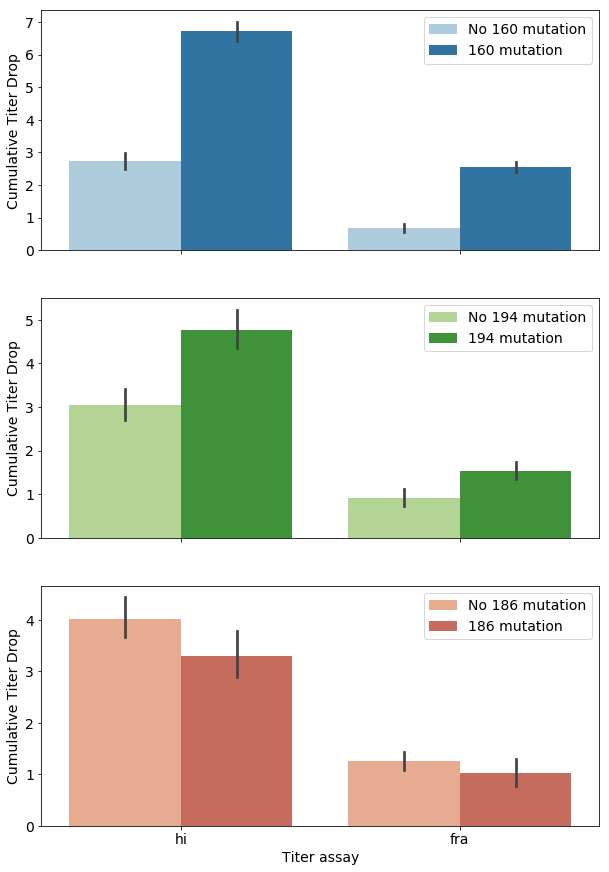

In [6]:
#Plot titer drops with and without mutation at 160
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,15))
sns.barplot(x='assay',y='cTiterSub',hue='mut160',data=egg_titer, ax=ax1, palette=['#a6cee3','#1f78b4'])
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ["No 160 mutation", "160 mutation"], loc=1, fontsize=14)

sns.barplot(x='assay',y='cTiterSub',hue='mut194',data=egg_titer, ax=ax2, palette=['#b2df8a','#33a02c'])
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ["No 194 mutation", "194 mutation"], loc=1, fontsize=14)

sns.barplot(x='assay',y='cTiterSub',hue='mut186',data=egg_titer, ax=ax3, palette=['#f4a582','#d6604d'])
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ["No 186 mutation", "186 mutation"], loc=1, fontsize=14)

for ax in [ax1,ax2,ax3]:
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel('Titer assay',fontsize=14)
    ax.set_ylabel('Cumulative Titer Drop',fontsize=14)
    ax.label_outer()


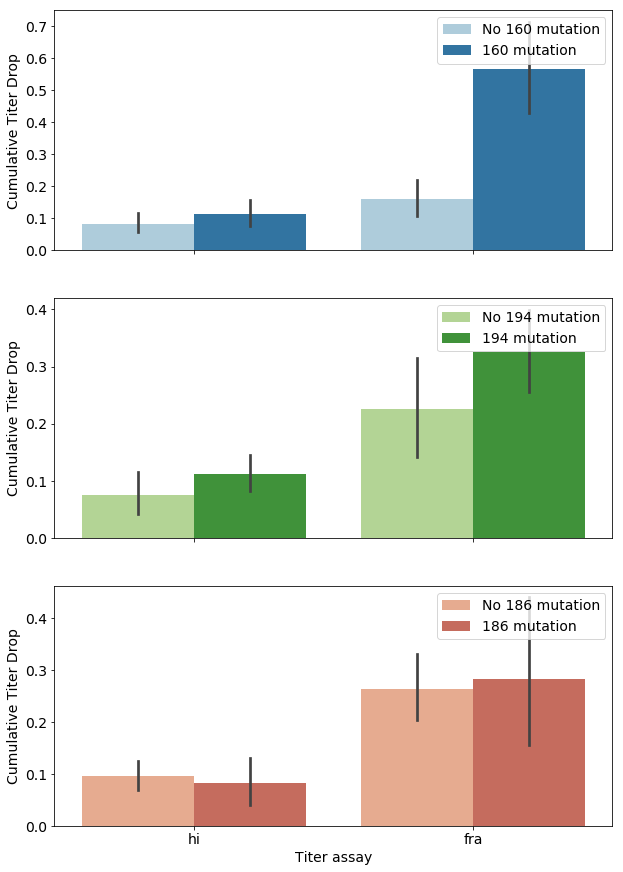

In [7]:
#Same but with dTiterSub
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,15))
sns.barplot(x='assay',y='dTiterSub',hue='mut160',data=egg_titer, ax=ax1, palette=['#a6cee3','#1f78b4'])
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ["No 160 mutation", "160 mutation"], loc=1, fontsize=14)

sns.barplot(x='assay',y='dTiterSub',hue='mut194',data=egg_titer, ax=ax2, palette=['#b2df8a','#33a02c'])
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ["No 194 mutation", "194 mutation"], loc=1, fontsize=14)

sns.barplot(x='assay',y='dTiterSub',hue='mut186',data=egg_titer, ax=ax3, palette=['#f4a582','#d6604d'])
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ["No 186 mutation", "186 mutation"], loc=1, fontsize=14)

for ax in [ax1,ax2,ax3]:
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel('Titer assay',fontsize=14)
    ax.set_ylabel('Cumulative Titer Drop',fontsize=14)
    ax.label_outer()


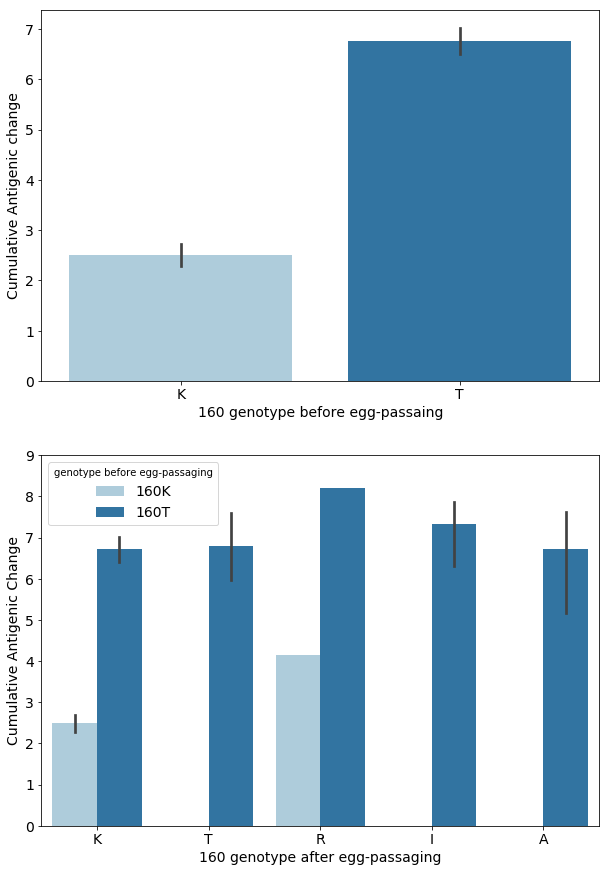

In [8]:
#Increase in cTiterSub for 106mut probably comes from background effect: 
#muts only happen in 160T strains, which have higher cTiterSub than 160K strains

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))
sns.barplot(x='circulating160',y='cTiterSub',data=egg_titer[egg_titer['assay']=='hi'], ax=ax1, palette=['#a6cee3','#1f78b4'])
ax1.set_xlabel('160 genotype before egg-passaing',fontsize=14)
ax1.set_ylabel('Cumulative Antigenic change',fontsize=14)
sns.barplot(x='160',y='cTiterSub',hue='circulating160',data=egg_titer[egg_titer['assay']=='hi'], ax=ax2, palette=['#a6cee3','#1f78b4'])
ax2.set_xlabel('160 genotype after egg-passaging', fontsize=14)
ax2.set_ylabel('Cumulative Antigenic Change',fontsize=14)
ax2.set_ylim(0.0,9.0)
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ["160K", "160T"], title='genotype before egg-passaging', loc=2, fontsize=14)

for ax in [ax1,ax2]:
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=14)

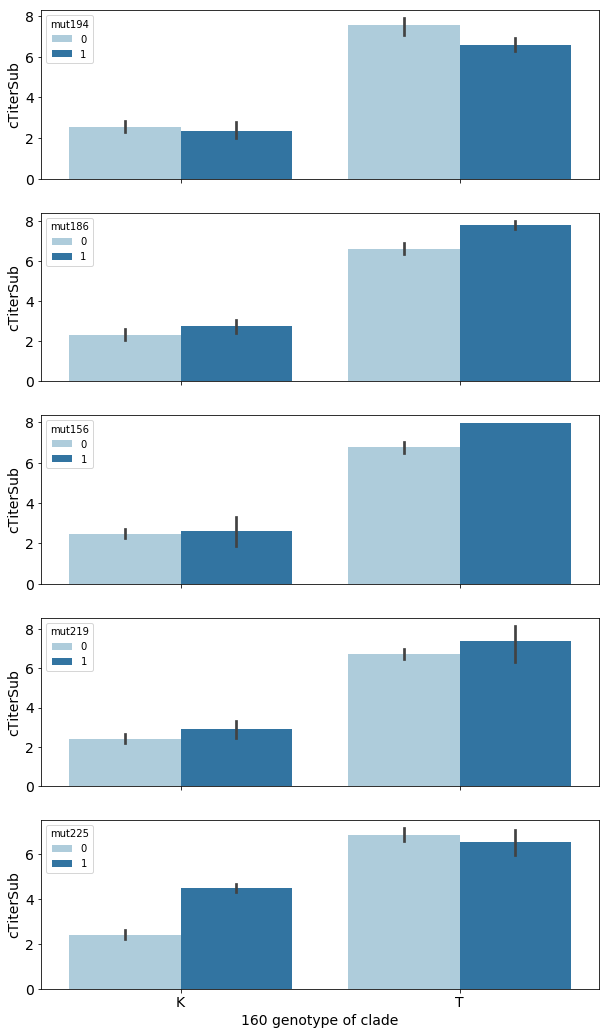

In [9]:
#Is antigenic change due to 194 also just a result of the background?

fig, (ax2,ax3,ax4,ax5,ax6) = plt.subplots(5,1,figsize=(10,18))
sns.barplot(x='circulating160',y='cTiterSub', hue='mut194',data=egg_hi, ax=ax2, palette=['#a6cee3','#1f78b4'])
sns.barplot(x='circulating160',y='cTiterSub', hue='mut186',data=egg_hi, ax=ax3, palette=['#a6cee3','#1f78b4'])
sns.barplot(x='circulating160',y='cTiterSub', hue='mut156',data=egg_hi, ax=ax4, palette=['#a6cee3','#1f78b4'])
sns.barplot(x='circulating160',y='cTiterSub', hue='mut219',data=egg_hi, ax=ax5, palette=['#a6cee3','#1f78b4'])
sns.barplot(x='circulating160',y='cTiterSub', hue='mut225',data=egg_hi, ax=ax6, palette=['#a6cee3','#1f78b4'])

for ax in [ax2,ax3,ax4,ax5,ax6]:
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel('160 genotype of clade', fontsize=14)
    ax.set_ylabel('cTiterSub', fontsize=14)
    ax.label_outer()


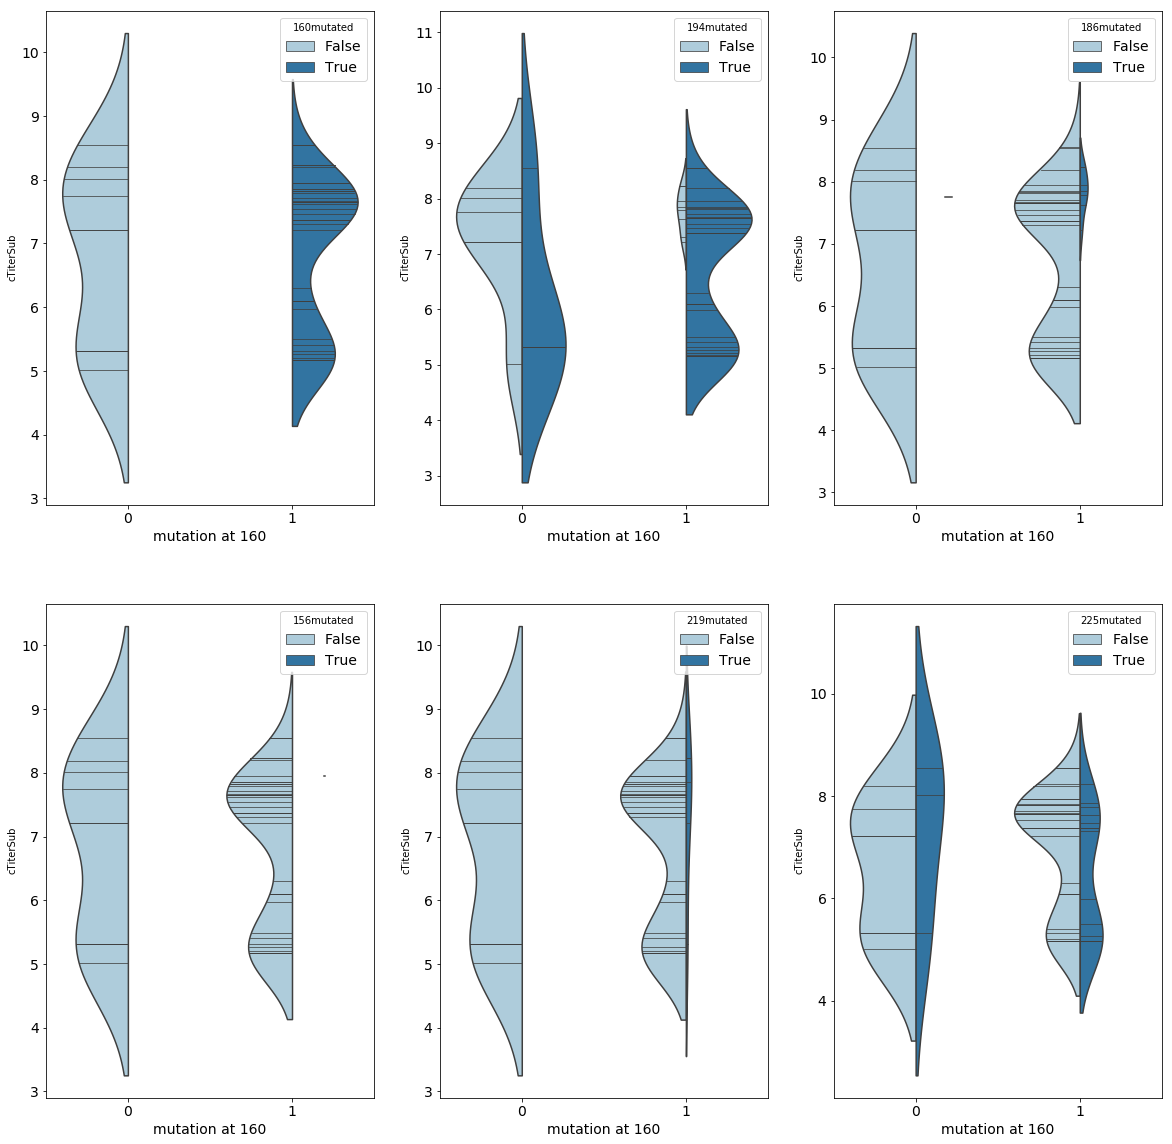

In [11]:
#Only egg-passaged strains derived from 160T unpassaged
mut_list= [160,194,186,156,219,225]
fig = plt.figure(figsize=(20,20))
ax_count=1
for i in mut_list:
    ax= fig.add_subplot(2,3, ax_count)
    sns.violinplot(x='mut160',y='cTiterSub', 
                   hue=('mut'+str(i)), 
                   data=egg_hi[egg_hi['circulating160']=='T'], palette=['#a6cee3','#1f78b4'], 
                   scale='count', inner='stick', scale_hue=True, split=True)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ["False", "True"], title=(str(i)+'mutated'), loc=1, fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel('mutation at 160', fontsize=14)
    ax_count+=1

Percent of un-passaged/egg-passaged matched samples where cTiterSub does not change: 
63.0136986301
Percent of un-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: 
35.6164383562
Percent of cell-passaged/egg-passaged matched samples where cTiterSub does not change: 
8.57142857143
Percent of cell-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: 
84.7619047619


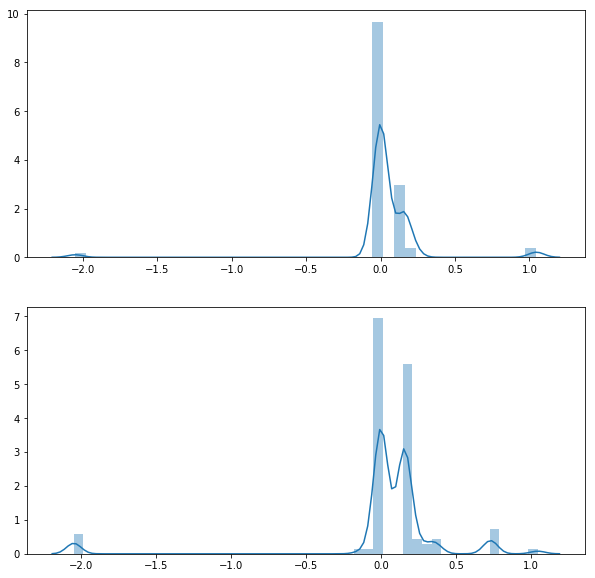

In [91]:
#Find difference in titer between direct -egg and -cell/-unpassaged matches, for hi titers
match_group = matches_hi.groupby('source')

hi_unpass_diffs = []
hi_cell_diffs = []
for g_name, g in match_group:
    if '0' in list(g['passage']):
        hi_unpass_diffs.append(float(g[g['passage']=='egg']['cTiterSub']) - float(g[g['passage']=='0']['cTiterSub']))
    if 'cell' in list(g['passage']):
        hi_cell_diffs.append(float(g[g['passage']=='egg']['cTiterSub']) - float(g[g['passage']=='cell']['cTiterSub'])) 

#Find how many pairs have different cTiterSub values

print ('Percent of un-passaged/egg-passaged matched samples where cTiterSub does not change: \n' + 
      str(float(sum(d==0 for d in hi_unpass_diffs))/float(len(hi_unpass_diffs))*100))
print ('Percent of un-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: \n' + 
      str(float(sum(d>0 for d in hi_unpass_diffs))/float(len(hi_unpass_diffs))*100))
print ('Percent of cell-passaged/egg-passaged matched samples where cTiterSub does not change: \n' + 
      str(float(sum(d==0 for d in hi_cell_diffs))/float(len(hi_cell_diffs))*100))
print ('Percent of cell-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: \n' + 
      str(float(sum(d>0 for d in hi_cell_diffs))/float(len(hi_cell_diffs))*100))
   

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
sns.distplot(hi_unpass_diffs, ax=ax1)
sns.distplot(hi_cell_diffs, ax=ax2)

A/Wisconsin/4/2018
Percent of un-passaged/egg-passaged matched samples where cTiterSub does not change: 
67.6923076923
Percent of un-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: 
32.3076923077
Percent of cell-passaged/egg-passaged matched samples where cTiterSub does not change: 
11.3402061856
Percent of cell-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: 
86.5979381443


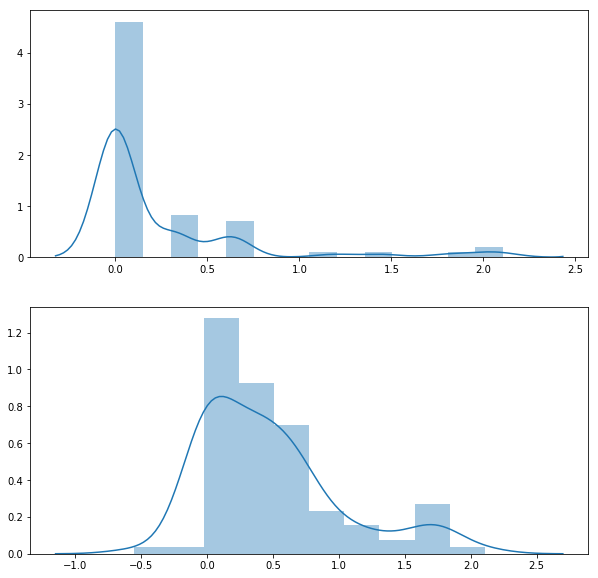

In [106]:
#Find difference in titer between direct -egg and -cell/-unpassaged matches, for fra titers
match_group_fra = matches_fra.groupby('source')

fra_unpass_diffs = []
fra_cell_diffs = []
for g_name, g in match_group_fra:
    try:
        if '0' in list(g['passage']):
            fra_unpass_diffs.append(float(g[g['passage']=='egg']['cTiterSub']) - float(g[g['passage']=='0']['cTiterSub']))
        if 'cell' in list(g['passage']):
            fra_cell_diffs.append(float(g[g['passage']=='egg']['cTiterSub']) - float(g[g['passage']=='cell']['cTiterSub']))
    except:
        print g_name

#Find how many pairs have different cTiterSub values

print ('Percent of un-passaged/egg-passaged matched samples where cTiterSub does not change: \n' + 
       str(float(sum(d==0 for d in fra_unpass_diffs))/float(len(fra_unpass_diffs))*100))
print ('Percent of un-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: \n' + 
       str(float(sum(d>0 for d in fra_unpass_diffs))/float(len(fra_unpass_diffs))*100))
print ('Percent of cell-passaged/egg-passaged matched samples where cTiterSub does not change: \n' + 
       str(float(sum(d==0 for d in fra_cell_diffs))/float(len(fra_cell_diffs))*100))
print ('Percent of cell-passaged/egg-passaged matched samples where cTiterSub increased in egg-passaged strain: \n' + 
       str(float(sum(d>0 for d in fra_cell_diffs))/float(len(fra_cell_diffs))*100))
   

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
sns.distplot(fra_unpass_diffs, ax=ax1)
sns.distplot(fra_cell_diffs, ax=ax2)